In [2]:
import numpy as np
import matplotlib.pyplot as plt
import mdtraj as md
from sklearn.linear_model import LinearRegression
from scipy import stats
import pickle5 as pickle
import block

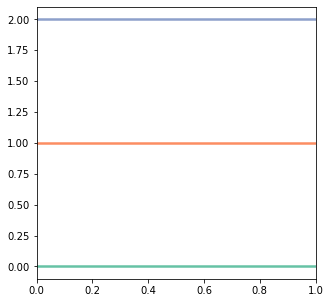

In [3]:
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

new_cmap = ['#66c2a5','#fc8d62','#8da0cb']
rtg_r = LinearSegmentedColormap.from_list("rtg", new_cmap)
colors = rtg_r(np.linspace(0,1,3))

#Test colormap
fig = plt.figure(figsize=(5,5))

for i,color in enumerate(colors):
    plt.axhline(i, color=color, linewidth=2.5)

In [4]:
proteins = ['hnRNPA1', 'hSUMO_hnRNPA1', 'TIA1']
lambdas = ['1.00', '1.02', '1.04', '1.06', '1.08', '1.10', '1.12', '1.14']
lambdas_float = [1.0, 1.02, 1.04, 1.06, 1.08, 1.10, 1.12, 1.14]
PI_distance_cutoff = 1.1
errmethod='hline' #Choose b3, hline or knee_loc

#Dictionary with protein:[exp_Rg, exp_err]
exp_Rg = {'hnRNPA1': [3.12, 0.022], 'hSUMO_hnRNPA1': [3.37, 0.014], 'TIA1': [2.75, 0.031]}


# Check distance to periodic image

WARNING! hnRNPA1 with lambda 1.14 comes within 0.830000 nm of its periodic image.


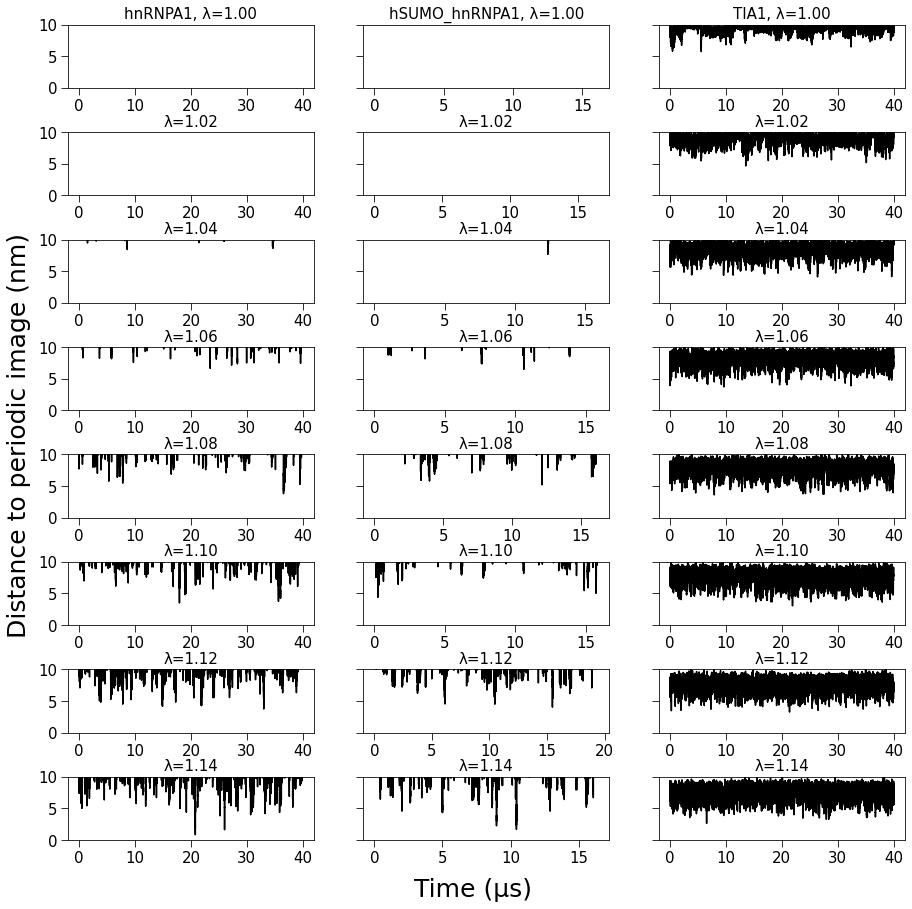

In [5]:
#Make outfile to log proteins that come too close to PI
PI_warning_outfile='PI_distance_warnings.log'
with open(PI_warning_outfile,'w') as f:
    f.write("# Simulations with distance to PI below the cut-off \n# Protein \tLambda \tShortest_dist_PI (nm) \n")

#fig, ax = plt.subplots(figsize=(30,15), nrows=len(lambdas), ncols=len(proteins), sharey='all', sharex='col')
fig, ax = plt.subplots(figsize=(15,15), nrows=len(lambdas), ncols=len(proteins), sharey='all')    

plt.subplots_adjust(hspace = 0.70)
fig.text(0.5, 0.09, 'Time (µs)', ha='center', va='top', fontsize=25)
fig.text(0.08, 0.5, 'Distance to periodic image (nm)', ha='center', va='center', fontsize=25, rotation=90)


n = 0
#Loop over all proteins
for protein in proteins:
    k=0
    #Loop over all PW rescaling lambdas
    for l in lambdas:
        
        #Get distance to PI as a function of time
        time, distance = np.genfromtxt('%s/lambda_%s/pi_mindist.xvg' % (str(protein), str(l)), usecols=(0,1), skip_header=29, unpack=True)
            
        #Find shortest distance and check if it is below the acceptable distance
        minimum_distance = np.amin(distance)
        if minimum_distance <= PI_distance_cutoff:
            print("WARNING! %s with lambda %s comes within %f nm of its periodic image." % (str(protein), str(l), minimum_distance))
            #Write to outfile
            with open(PI_warning_outfile, 'a') as f:
                f.write("%s \t%s \t%f \n" % (str(protein), str(l), minimum_distance))
                
        #Plot distance to PI vs time
        ax[k,n].plot(time, distance, '-', color='black')
        if k == 0:
            ax[k,n].set_title('%s, λ=%s' % (str(protein), str(l)), fontsize=15)
        else:
            ax[k,n].set_title('λ=%s' % str(l), fontsize=15)
        ax[k,n].set_ylim(0,10)
        ax[k,n].tick_params(colors='black', direction='out', length=7, labelsize=15)
        
        k+=1
    n+=1

fig.savefig("figures/PI_distances.png", bbox_inches='tight', pad_inches=1, dpi=400)
fig.savefig("figures/PI_distances.pdf", bbox_inches='tight', pad_inches=1, dpi=400)

# Check Rg convergence

Removing 1 at the bottom of each replica
Possible blocks transformations: 35



/lindorffgrp-isilon/thomasen/MARTINI_PWrescaling/multidomain/Production_run/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )


Removing 1 at the bottom of each replica
Possible blocks transformations: 35



/lindorffgrp-isilon/thomasen/MARTINI_PWrescaling/multidomain/Production_run/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )


Removing 1 at the bottom of each replica
Possible blocks transformations: 35



/lindorffgrp-isilon/thomasen/MARTINI_PWrescaling/multidomain/Production_run/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )


Removing 1 at the bottom of each replica
Possible blocks transformations: 35



/lindorffgrp-isilon/thomasen/MARTINI_PWrescaling/multidomain/Production_run/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )


Removing 1 at the bottom of each replica
Possible blocks transformations: 35



/lindorffgrp-isilon/thomasen/MARTINI_PWrescaling/multidomain/Production_run/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )


Removing 1 at the bottom of each replica
Possible blocks transformations: 35



/lindorffgrp-isilon/thomasen/MARTINI_PWrescaling/multidomain/Production_run/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )


Removing 1 at the bottom of each replica
Possible blocks transformations: 35



/lindorffgrp-isilon/thomasen/MARTINI_PWrescaling/multidomain/Production_run/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )


Removing 1 at the bottom of each replica
Possible blocks transformations: 35



/lindorffgrp-isilon/thomasen/MARTINI_PWrescaling/multidomain/Production_run/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )


Removing 1 at the bottom of each replica
Possible blocks transformations: 2

Removing 2 at the bottom of each replica
Possible blocks transformations: 24



/lindorffgrp-isilon/thomasen/MARTINI_PWrescaling/multidomain/Production_run/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )


Removing 1 at the bottom of each replica
Possible blocks transformations: 8

Removing 2 at the bottom of each replica
Possible blocks transformations: 4

Removing 3 at the bottom of each replica
Possible blocks transformations: 8

Removing 4 at the bottom of each replica
Possible blocks transformations: 4

Removing 5 at the bottom of each replica
Possible blocks transformations: 48



/lindorffgrp-isilon/thomasen/MARTINI_PWrescaling/multidomain/Production_run/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )


Removing 1 at the bottom of each replica
Possible blocks transformations: 8

Removing 2 at the bottom of each replica
Possible blocks transformations: 4

Removing 3 at the bottom of each replica
Possible blocks transformations: 64



/lindorffgrp-isilon/thomasen/MARTINI_PWrescaling/multidomain/Production_run/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )


Removing 1 at the bottom of each replica
Possible blocks transformations: 12

Removing 2 at the bottom of each replica
Possible blocks transformations: 4

Removing 3 at the bottom of each replica
Possible blocks transformations: 16

Removing 4 at the bottom of each replica
Possible blocks transformations: 2

Removing 5 at the bottom of each replica
Possible blocks transformations: 20



/lindorffgrp-isilon/thomasen/MARTINI_PWrescaling/multidomain/Production_run/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )


Possible blocks transformations: 24
 no lenght correction needed



/lindorffgrp-isilon/thomasen/MARTINI_PWrescaling/multidomain/Production_run/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )


Removing 1 at the bottom of each replica
Possible blocks transformations: 16

Removing 2 at the bottom of each replica
Possible blocks transformations: 2

Removing 3 at the bottom of each replica
Possible blocks transformations: 20



/lindorffgrp-isilon/thomasen/MARTINI_PWrescaling/multidomain/Production_run/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )


Removing 1 at the bottom of each replica
Possible blocks transformations: 16

Removing 2 at the bottom of each replica
Possible blocks transformations: 4

Removing 3 at the bottom of each replica
Possible blocks transformations: 6

Removing 4 at the bottom of each replica
Possible blocks transformations: 4

Removing 5 at the bottom of each replica
Possible blocks transformations: 4

Removing 6 at the bottom of each replica
Possible blocks transformations: 2

Removing 7 at the bottom of each replica
Possible blocks transformations: 60



/lindorffgrp-isilon/thomasen/MARTINI_PWrescaling/multidomain/Production_run/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )


Possible blocks transformations: 32
 no lenght correction needed



/lindorffgrp-isilon/thomasen/MARTINI_PWrescaling/multidomain/Production_run/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )


Removing 1 at the bottom of each replica
Possible blocks transformations: 35



/lindorffgrp-isilon/thomasen/MARTINI_PWrescaling/multidomain/Production_run/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )


Removing 1 at the bottom of each replica
Possible blocks transformations: 35



/lindorffgrp-isilon/thomasen/MARTINI_PWrescaling/multidomain/Production_run/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )


Removing 1 at the bottom of each replica
Possible blocks transformations: 35



/lindorffgrp-isilon/thomasen/MARTINI_PWrescaling/multidomain/Production_run/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )


Removing 1 at the bottom of each replica
Possible blocks transformations: 35



/lindorffgrp-isilon/thomasen/MARTINI_PWrescaling/multidomain/Production_run/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )


Removing 1 at the bottom of each replica
Possible blocks transformations: 35



/lindorffgrp-isilon/thomasen/MARTINI_PWrescaling/multidomain/Production_run/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )


Removing 1 at the bottom of each replica
Possible blocks transformations: 35



/lindorffgrp-isilon/thomasen/MARTINI_PWrescaling/multidomain/Production_run/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )


Removing 1 at the bottom of each replica
Possible blocks transformations: 35



/lindorffgrp-isilon/thomasen/MARTINI_PWrescaling/multidomain/Production_run/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )


Removing 1 at the bottom of each replica
Possible blocks transformations: 35



/lindorffgrp-isilon/thomasen/MARTINI_PWrescaling/multidomain/Production_run/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )


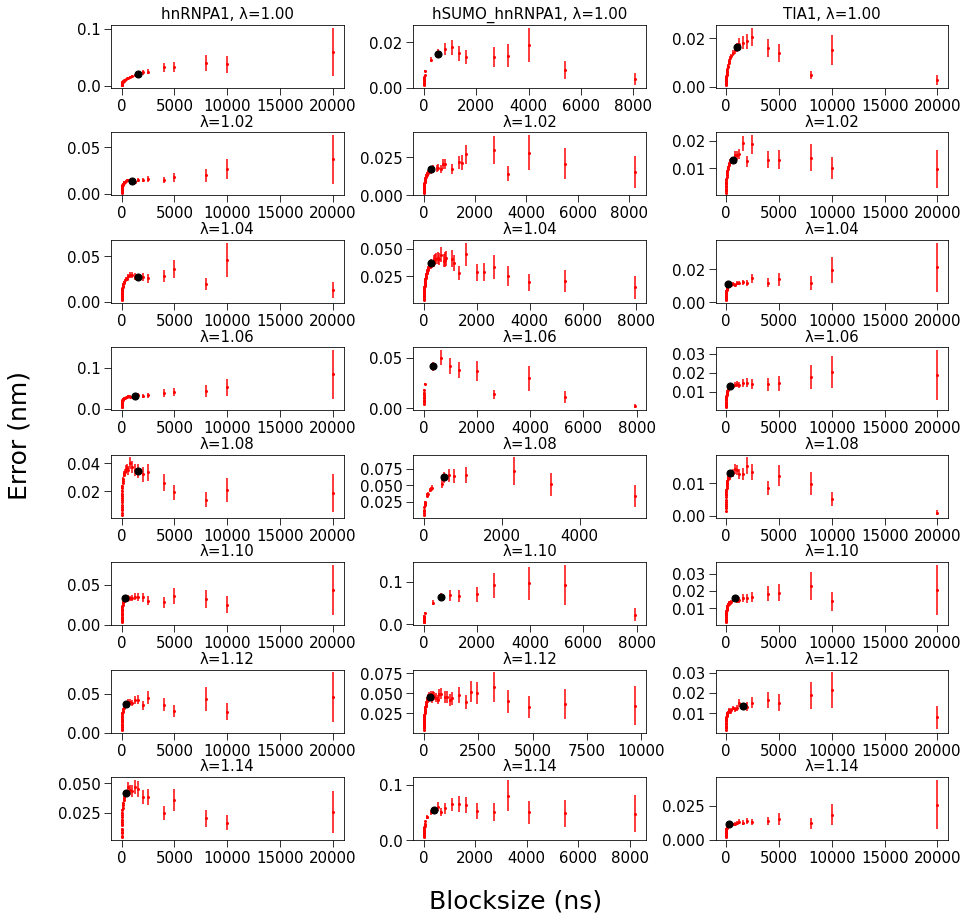

In [7]:
fig, ax = plt.subplots(figsize=(15,15), nrows=len(lambdas), ncols=len(proteins))    
plt.subplots_adjust(hspace = 0.70, wspace = 0.3)
fig.text(0.5, 0.08, 'Blocksize (ns)', ha='center', va='top', fontsize=25)
fig.text(0.04, 0.5, 'Error (nm)', ha='center', va='center', fontsize=25, rotation=90)
    
n = 0

#Loop over all proteins
for i,protein in enumerate(proteins):
    
    k=0
    
    #Loop over all PW rescaling lambdas
    for l in lambdas:
        
        #Load traj
        time, Rg = np.genfromtxt('%s/lambda_%s/Rg_gyrate.xvg' % (str(protein), str(l)), usecols=(0,1), skip_header=27, unpack=True)      
        
        #Trim Rg array for block error analysis
        Rg = block.check(Rg, multi=1)
        
        #Block error analysis
        blocks_stat = block.blocking(Rg)
        
        #Choose optimal block size and find error
        if errmethod=='b3':
            corr_len, err = block.optimal_block(len(Rg),blocks_stat,method="b3")
        elif errmethod=='knee_loc':
            corr_len, err = block.optimal_block(len(Rg),blocks_stat,method="knee_loc",S=2.7)
        elif errmethod=='hline':
            corr_len, err = block.optimal_block(len(Rg),blocks_stat,method="hline")
        
        #Plot
        ax[k,n].errorbar(blocks_stat[...,0],blocks_stat[...,1],blocks_stat[...,2],fmt='ro',ms=2)

        if k == 0:
            ax[k,n].set_title('%s, λ=%s' % (str(proteins[i]), str(l)), fontsize=15)
        else:
            ax[k,n].set_title('λ=%s' % str(l), fontsize=15)
        #ax[k,n].set_ylim(0,10)
        ax[k,n].tick_params(colors='black', direction='out', length=7, labelsize=15)
        
        ax[k,n].scatter(corr_len,err,c='k',zorder=300,s=50)
        
        k+=1
    n+=1

fig.savefig("figures/Rg_blockerror.png", bbox_inches='tight', pad_inches=1, dpi=400)
fig.savefig("figures/Rg_blockerror.pdf", bbox_inches='tight', pad_inches=1, dpi=400)

# Rg one plot

/lindorffgrp-isilon/thomasen/MARTINI_PWrescaling/multidomain/Production_run/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )
/lindorffgrp-isilon/thomasen/MARTINI_PWrescaling/multidomain/Production_run/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )
/lindorffgrp-isilon/thomasen/MARTINI_PWrescaling/multidomain/Production_run/block.py:59: RuntimeWarning: invalid value encountered in double_scalars
  err = np.sqrt( ((blocks_av - u)**2).sum() / (Nb*(Nb-1)) )


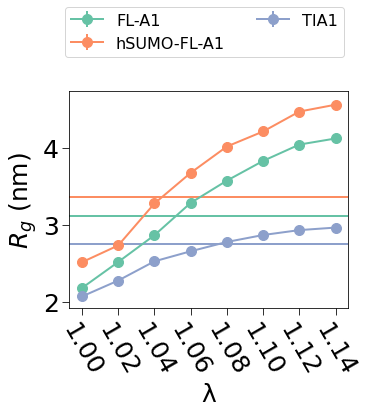

In [8]:
fig = plt.figure(figsize=(5,4))    

x_ticks = np.arange(1.00, 1.16, step=0.02)
mean_square_error = 0
chi2 = 0
lambda_mins = []
Rg_square_error_vs_protein = []
Rg_chi2_vs_protein = []

#Loop over all proteins
for i,protein in enumerate(proteins):
    
    Rg_vs_lambda = []
    Rgerr_vs_lambda = []
    
    #Loop over all PW rescaling lambdas
    for l in lambdas:
        
        #Load traj
        time, Rg = np.genfromtxt('%s/lambda_%s/Rg_gyrate.xvg' % (str(protein), str(l)), usecols=(0,1), skip_header=27, unpack=True)
        Rg_avg = np.average(Rg)
        #Calculate Rg
        Rg_vs_lambda.append(Rg_avg)
        
        #Block error analysis
        blocks_stat = block.blocking(Rg)
        if errmethod != 'knee_loc':
            corr_len, err = block.optimal_block(len(Rg),blocks_stat,method=errmethod)
        elif errmethod == 'knee_loc':
            corr_len, err = block.optimal_block(len(Rg),blocks_stat,method="knee_loc",S=2.7)
            
        Rgerr_vs_lambda.append(err)
    
    #Calculate square-error of each Rg to experimental, find minimum distance and get corresponding lambda value
    Rg_vs_lambda = np.array(Rg_vs_lambda)
    Rg_square_error = np.square(Rg_vs_lambda-exp_Rg[proteins[i]][0])
    Rg_chi2 = np.square((Rg_vs_lambda-exp_Rg[proteins[i]][0])/exp_Rg[proteins[i]][1])
    
    lambda_mins.append(lambdas_float[np.argmin(Rg_square_error)])
    Rg_square_error_vs_protein.append(Rg_square_error)
    Rg_chi2_vs_protein.append(Rg_chi2)
    
    #Add square_error vs lambda to running sum for averaging
    mean_square_error += Rg_square_error
    chi2 += Rg_chi2
    
    if 'hSUMO_hnRNPA1' == protein:
        plt.errorbar(lambdas_float, Rg_vs_lambda, yerr=Rgerr_vs_lambda, fmt='-o', linewidth=2, markersize=10, color=colors[i], label='hSUMO-FL-A1')
    elif 'hnRNPA1' == protein:
        plt.errorbar(lambdas_float, Rg_vs_lambda, yerr=Rgerr_vs_lambda, fmt='-o', linewidth=2, markersize=10, color=colors[i], label='FL-A1')
    else:
        plt.errorbar(lambdas_float, Rg_vs_lambda, yerr=Rgerr_vs_lambda, fmt='-o', linewidth=2, markersize=10, color=colors[i], label=protein)
  
    plt.axhline(exp_Rg[protein][0], linewidth=2, color=colors[i])
    
#ax[int(len(proteins)/4)-1,3].legend(fontsize=15, loc='lower right')
fig.legend(fontsize=16, loc='upper center', bbox_to_anchor=(0.5, 1.20), ncol=2)

plt.xticks(x_ticks)
plt.xlabel('λ', fontsize=25)
plt.ylabel('$\it{R}$$_g$ (nm)', fontsize=25)
plt.tick_params(colors='black', direction='out', length=7, labelsize=25)
plt.tick_params(axis='x', colors='black', direction='out', length=7, labelsize=25, rotation=-60)

#Calculate mean-square-error over all proteins for each lambda
mean_square_error=mean_square_error/len(proteins)
chi2=chi2/len(proteins)

fig.savefig("figures/Rg_vs_lambda_oneplot.png", bbox_inches='tight', pad_inches=1, dpi=400)
fig.savefig("figures/Rg_vs_lambda_oneplot.pdf", bbox_inches='tight', pad_inches=1, dpi=400)

# Chi2 to SAXS data

In [10]:
## Chi2 to SAXS

#Load chi2 pickle
with open('martini3saxs_md.pkl', "rb") as f:
    SAXSchi2_vs_proteins = pickle.load(f)
#for protein in SAXSchi2_vs_proteins:
    #if protein not in proteins:
        #SAXSchi2_vs_proteins=SAXSchi2_vs_proteins.drop(columns=[protein])
print(SAXSchi2_vs_proteins)

           TIA1    hnRNPA1  hSUMO_hnRNPA1
1.00  99.399475  13.503447      10.622523
1.02  46.058875   4.511986       5.142763
1.04   9.134273   1.429635       1.110581
1.06   4.765695   1.541019       3.667839
1.08  11.374440   3.256217       5.418018
1.10  17.554979   5.353916       7.463611
1.12  29.930336   7.192521       8.950685
1.14  31.657982   8.129938      10.982674


1.00    29.124040
1.02    13.745040
1.04     2.623006
1.06     0.946549
1.08     2.427366
1.10     3.764988
1.12     7.303900
1.14     7.413109
dtype: float64
1.00    41.175148
1.02    18.571208
1.04     3.891496
1.06     3.324851
1.08     6.682892
1.10    10.124169
1.12    15.357847
1.14    16.923531
dtype: float64


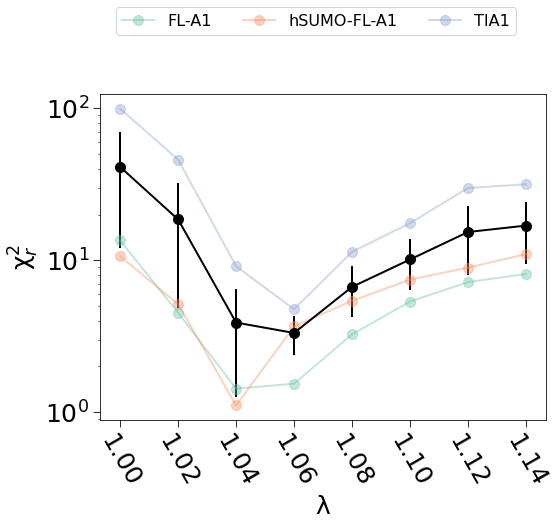

In [11]:
#Set x-ticks
x_ticks = np.arange(1.00, 1.16, step=0.02)

#Get average and SEM
SAXSchi2_average = SAXSchi2_vs_proteins.mean(axis=1)
SAXSchi2_err = SAXSchi2_vs_proteins.sem(axis=1)

#Start plot
fig = plt.figure(figsize=(8,6))
plt.xlabel('λ', fontsize=25)
plt.ylabel('χ$^{2}_r$', fontsize=25)
plt.tick_params(colors='black', direction='out', length=7, labelsize=25)
plt.tick_params(axis='x', colors='black', direction='out', length=7, labelsize=25, rotation=-60)
plt.xticks(x_ticks)
plt.yscale('log')

#Loop through proteins and plot
for i,protein in enumerate(proteins):
    
    if 'hSUMO_hnRNPA1' == protein:
        plt.plot(lambdas_float, SAXSchi2_vs_proteins[protein], '-o', linewidth=2, markersize=10, color=colors[i], alpha=0.4, label='hSUMO-FL-A1')
    elif 'hnRNPA1' == protein:
        plt.plot(lambdas_float, SAXSchi2_vs_proteins[protein], '-o', linewidth=2, markersize=10, color=colors[i], alpha=0.4, label='FL-A1')
    else:
        plt.plot(lambdas_float, SAXSchi2_vs_proteins[protein], '-o', linewidth=2, markersize=10, color=colors[i], alpha=0.4, label=protein)

plt.errorbar(lambdas_float, SAXSchi2_average, yerr=SAXSchi2_err, fmt='-o', linewidth=2, markersize=10, color='black')

fig.legend(fontsize=16, loc='upper center', bbox_to_anchor=(0.5, 1.10), ncol=4)

fig.savefig("figures/SAXS_Chi2_vs_lambda_oneplot.png", bbox_inches='tight', pad_inches=1, dpi=300)
fig.savefig("figures/SAXS_Chi2_vs_lambda_oneplot.pdf", bbox_inches='tight', pad_inches=1, dpi=300)

print(SAXSchi2_err)
print(SAXSchi2_average)


## Plot Rg distributions

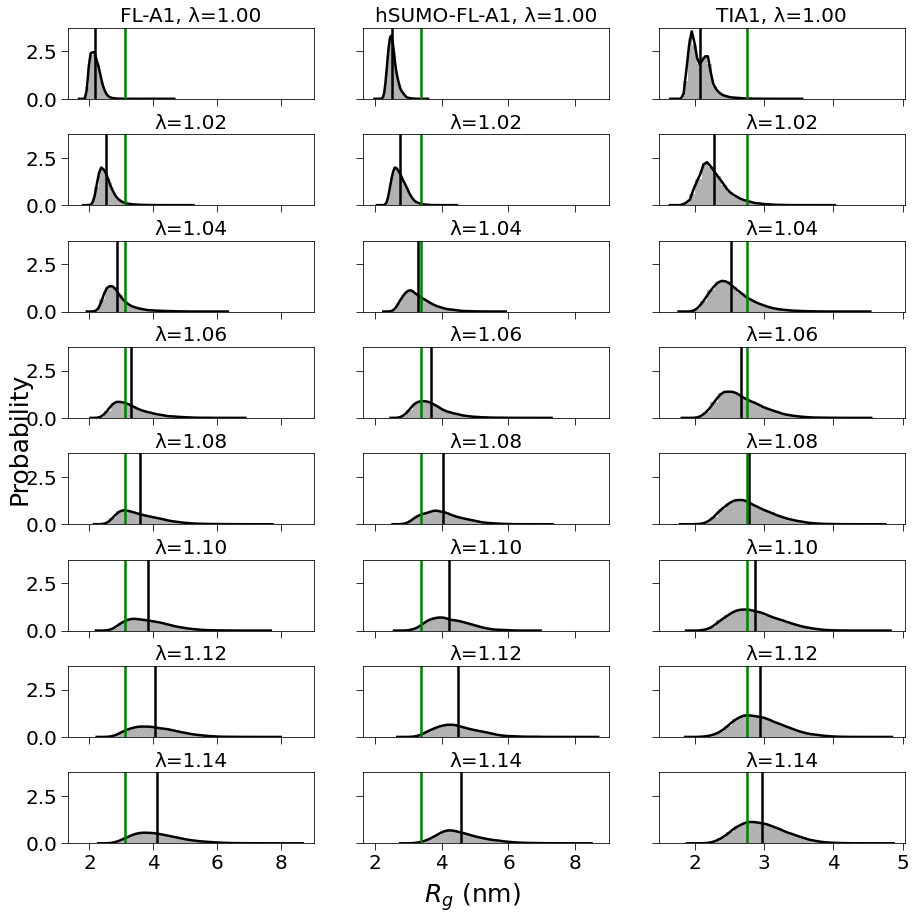

In [13]:
fig, ax = plt.subplots(figsize=(15,15), nrows=len(lambdas), ncols=len(proteins), sharey='all', sharex='col')    
plt.subplots_adjust(hspace = 0.50)
fig.text(0.5, 0.09, '$\it{R}$$_g$ (nm)', ha='center', va='top', fontsize=25)
fig.text(0.08, 0.5, 'Probability', ha='center', va='center', fontsize=25, rotation=90)

n = 0
#Loop over all proteins
for protein in proteins:
    k=0
    
    #Loop over all PW rescaling lambdas
    for l in lambdas:
        
        #Load traj
        time, Rg = np.genfromtxt('%s/lambda_%s/Rg_gyrate.xvg' % (str(protein), str(l)), usecols=(0,1), skip_header=27, unpack=True)

        kde_x = np.linspace( np.amin(Rg)*0.9, np.amax(Rg)*1.1, num = 50 )
        kde_y = stats.gaussian_kde(Rg, bw_method = "silverman").evaluate(kde_x)
        
        ax[k,n].hist(Rg, density=True, color='black', alpha=0.3, bins=20)
        ax[k,n].plot(kde_x, kde_y, '-', linewidth=2.5, color='black')
        
        ax[k,n].axvline(np.average(Rg),linewidth=2.5, alpha=1, color='black', label='Average')
        ax[k,n].axvline(exp_Rg[protein][0],linewidth=2.5, alpha=1, color='green', label='Experimental')
        
        
        if k == 0:
            if 'hSUMO_hnRNPA1' == protein:
                ax[k,n].set_title('%s, λ=%s' % ('hSUMO-FL-A1', str(l)), fontsize=20)
            elif 'hnRNPA1' == protein:
                ax[k,n].set_title('%s, λ=%s' % ('FL-A1', str(l)), fontsize=20)
            else:
                ax[k,n].set_title('%s, λ=%s' % (str(protein), str(l)), fontsize=20)
        else:
            ax[k,n].set_title('λ=%s' % str(l), fontsize=20)
        
        ax[k,n].tick_params(colors='black', direction='out', length=7, labelsize=20)
        
        k+=1
    n+=1

fig.savefig("figures/Rg_distributions.png", bbox_inches='tight', pad_inches=1, dpi=400)
fig.savefig("figures/Rg_distributions.pdf", bbox_inches='tight', pad_inches=1, dpi=400)